The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
/home/jovyan/.local/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 5 seconds.
The number of effective samples is smaller than 25% for some parameters.
/tmp/ipykernel_105552/803021065.py:21: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/home/jovyan/.local/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


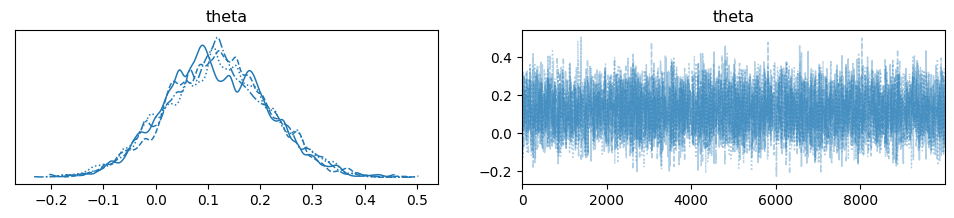

In [48]:
#!pip install pymc3
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

# Define the model context
with pm.Model() as model:
    # Prior distribution for the unknown parameter
    theta = pm.Normal('theta', mu=0, sigma=1)
    
    # Likelihood (sampling distribution) of observations
    observations = pm.Normal('observations', mu=theta, sigma=1, observed=np.random.randn(100))
    
    # Setup Metropolis Hastings Sampler
    step = pm.Metropolis()
    
    # Sample from the posterior using the Metropolis-Hastings algorithm
    trace = pm.sample(10000, step=step)

# Plot the trace
pm.traceplot(trace)
plt.show()

<p><span style="font-size: 14pt;"><strong>$$ Question 2.1</strong></span><br /><br /></p>

In [49]:
from scipy.optimize import differential_evolution


# Define the negative of the normal probability density function
def neg_normal_pdf(x, mu, sigma):
    return -1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

# Parameters for the normal distribution
mu = 0  # mean
sigma = 1  # standard deviation

# Bounds for the variable x
bounds = [(-10, 10)]

# Use differential evolution to maximize the probability density function
result = differential_evolution(neg_normal_pdf, bounds, args=(mu, sigma))

print("The x value that maximizes the probability density is:", result.x[0])


The x value that maximizes the probability density is: 3.2742457963345625e-08


<p><span style="font-size: 18pt;"><strong>$$ Question 2.2, 2.3</strong></span></p>

In [50]:
# QUESTION 2 PART 2,3



# Define the model
with pm.Model() as model:
    # Define the unknown parameter 'x' with a prior as Normal distribution centered at 0 with variance 1
    x = pm.Normal('x', mu=0, sigma=1)
    
    # Use Metropolis-Hastings for sampling; this is inherently a random walk because we're using the default proposal distribution
    step = pm.Metropolis()
    trace = pm.sample(50000, step=step, tune=10000, return_inferencedata=False)

# Extract the trace of 'x' after burn-in
x_samples = trace.get_values('x', burn=10000)

# Calculate mean and variance
mean_x = np.mean(x_samples)
var_x = np.var(x_samples)

# Calculate the 2.5% and 97.5% percentiles
ci_low, ci_high = np.percentile(x_samples, [2.5, 97.5])

print(f"Mean of x: {mean_x}")
print(f"Variance of x: {var_x}")
print(f"95% Confidence Interval of x: ({ci_low}, {ci_high})")
# COMMENT ON PART 1,2,3
# we can see mean and standard deviatopn indeed match our expected value from normal ( 0,1)  also CI is also falls in around -1.96 and 1.95 tht is usally our 95% z score upp
# upper and lower bound. so looks good. 

The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [x]


Sampling 4 chains for 10_000 tune and 50_000 draw iterations (40_000 + 200_000 draws total) took 26 seconds.
The number of effective samples is smaller than 25% for some parameters.


Mean of x: -0.0028678405717189387
Variance of x: 1.0056874945997718
95% Confidence Interval of x: (-1.9558321761340418, 1.9789442997521336)


<p><span style="font-size: 14pt;"><strong>[Q: 2.3.]</strong></span></p>
<p><span style="font-size: 14pt;"><strong> How do we determine the best solution of $x$ from the sampled values of the Markov chain? What is your best (optimum) value of $x$? Is this value what you expected?</strong></span></p>
<p><span style="font-size: 14pt;"><strong>[Q: 2.4.]</strong></span></p>
<p><span style="font-size: 14pt;"><strong>What are the sample mean $m$ and sample variance $s^2$ of $x$ according to the last 5,000 samples of $x$ in the Markov chain? Do these values compare well to their theoretical counterparts $\mu$ and $\sigma^2$ of the standard normal target distribution?</strong></span></p>
<p><span style="font-size: 14pt;"><span style="font-size: 18.6667px;"><strong>[Q: 2.5.] Plot a histogram of the last 5,000 samples of $x$.</strong></span></span></p>

The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 5 seconds.
The number of effective samples is smaller than 25% for some parameters.
/tmp/ipykernel_105552/1477407677.py:16: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/home/jovyan/.local/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


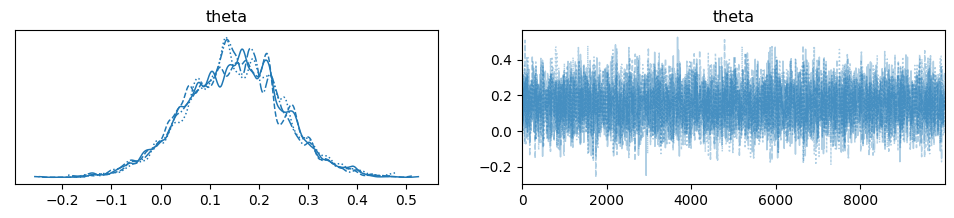

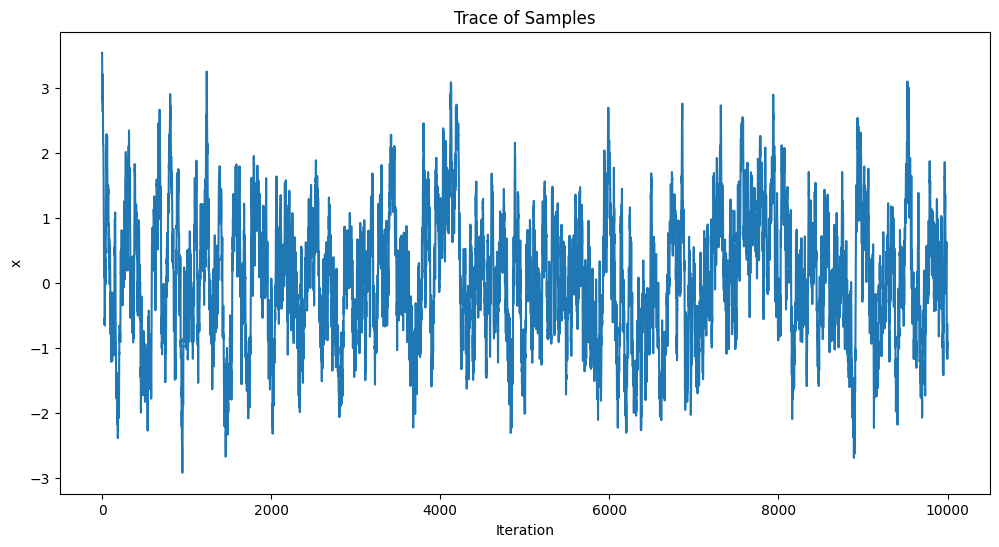

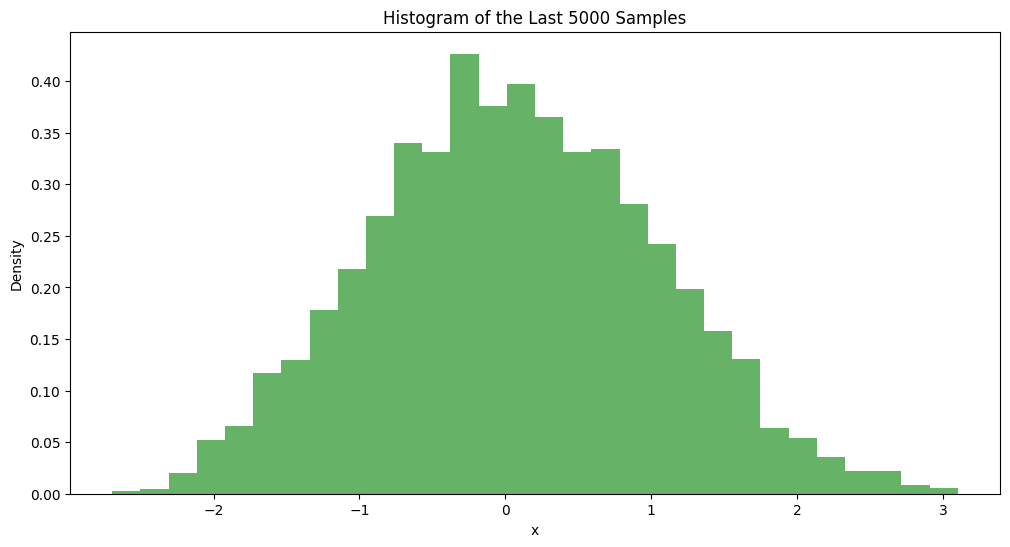

(0.06219288491318523, 0.9447403254132705, 0.08090324997694755, 0, 1)

In [51]:



# Define the model context
with pm.Model() as model:
    # Prior distribution for the unknown parameter
    theta = pm.Normal('theta', mu=0, sigma=1)
    
    # Likelihood (sampling distribution) of observations
    observations = pm.Normal('observations', mu=theta, sigma=1, observed=np.random.randn(100))
    
    # Setup Metropolis Hastings Sampler
    step = pm.Metropolis()
    
    # Sample from the posterior using the Metropolis-Hastings algorithm
    trace = pm.sample(10000, step=step, return_inferencedata=False)

# Plot the trace
pm.traceplot(trace)

plt.show()

################### part 2.3


# Define the target distribution (standard normal distribution)
def target_distribution(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

# Random Walk Metropolis (RWM) algorithm
def rwm_algorithm(T, x0, a, b):
    samples = np.zeros(T)
    samples[0] = x0
    for t in range(1, T):
        x_current = samples[t-1]
        x_proposal = x_current + np.random.uniform(a, b)
        acceptance_ratio = target_distribution(x_proposal) / target_distribution(x_current)
        if np.random.rand() < acceptance_ratio:
            samples[t] = x_proposal
        else:
            samples[t] = x_current
    return samples

# Parameters
T = 10000
x0 = np.random.uniform(-5, 5)
a = -0.5
b = 0.5

# Generate samples using RWM algorithm
samples = rwm_algorithm(T, x0, a, b)

# Extract the last 5000 samples
last_5000_samples = samples[-5000:]

# Calculate the sample mean and sample variance
sample_mean = np.mean(last_5000_samples)
sample_variance = np.var(last_5000_samples)

# Theoretical mean and variance of the standard normal distribution
theoretical_mean = 0
theoretical_variance = 1

# Determine the best solution of x from the sampled values
best_solution = np.mean(samples)

# Plot the trace of the samples
plt.figure(figsize=(12, 6))
plt.plot(samples)
plt.title('Trace of Samples')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.show()

# Plot the histogram of the last 5000 samples
plt.figure(figsize=(12, 6))
plt.hist(last_5000_samples, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of the Last 5000 Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

# Display results
sample_mean, sample_variance, best_solution, theoretical_mean, theoretical_variance

<p><span style="font-size: 14pt;"><strong>[Q: 2.6.] How would you determine the 95\% confidence interval of $x$ from its samples in the Markov chain? Please explain in detail how you do this! Hint: You can compute this result using only the last 5,000 Markov chain samples of $x$. No kernel smoothing, interpolation method etc. is required.</strong></span></p>

In [52]:


ci_low, ci_high = np.percentile(last_5000_samples, [2.5, 97.5])

print(f"The 95% confidence interval of x is from {ci_low} to {ci_high}")


The 95% confidence interval of x is from -1.7636441789928994 to 2.020147255193644


<p><span style="font-size: 18pt;"><strong>Question 2.8-2.12</strong></span></p>

In [41]:
# target distrubution update 


# Define the target distribution with mean mu = -2 and standard deviation sigma = sqrt(0.01)
def target_distribution(x):
    mu = -2
    sigma = np.sqrt(0.01)
    return np.exp(-0.5 * ((x - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))


In [53]:
# implement RWM
def rwm_algorithm(T, x0, a, b):
    samples = np.zeros(T)
    samples[0] = x0
    for t in range(1, T):
        x_current = samples[t-1]
        x_proposal = x_current + np.random.uniform(a, b)
        acceptance_ratio = target_distribution(x_proposal) / target_distribution(x_current)
        if np.random.rand() < acceptance_ratio:
            samples[t] = x_proposal
        else:
            samples[t] = x_current
    return samples

# Generate samples
T = 10000
x0 = np.random.uniform(-5, 5)
a = -0.5
b = 0.5
samples = rwm_algorithm(T, x0, a, b)


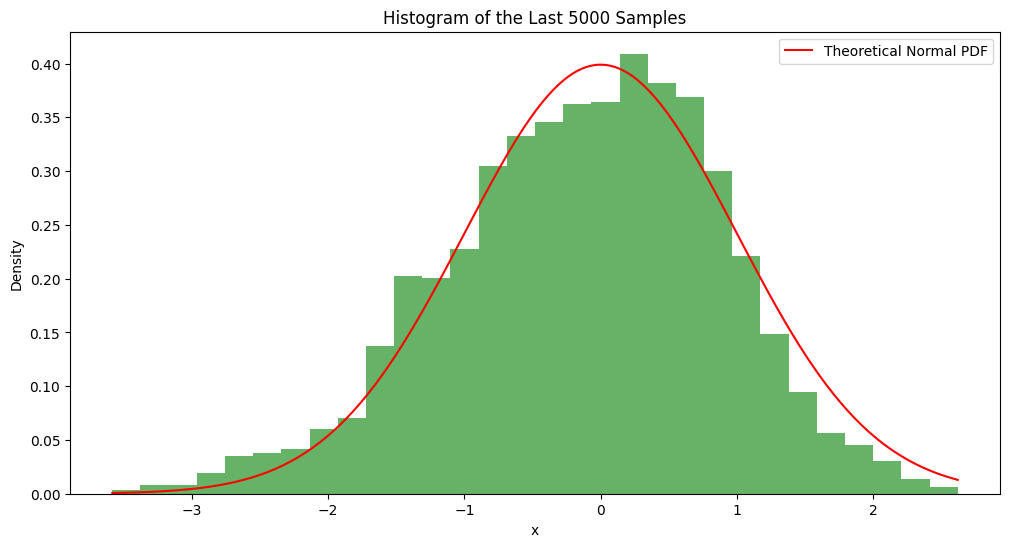

In [54]:
# plot histogram import matplotlib.pyplot as plt

# Extract the last 5000 samples
last_5000_samples = samples[-5000:]

# Plot histogram
plt.figure(figsize=(12, 6))
counts, bin_edges = np.histogram(last_5000_samples, bins=30, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
plt.bar(bin_centers, counts, align='center', width=np.diff(bin_edges), alpha=0.6, color='g')

# Plot the theoretical normal density curve
x_values = np.linspace(min(last_5000_samples), max(last_5000_samples), 300)
plt.plot(x_values, target_distribution(x_values), 'r', label='Theoretical Normal PDF')
plt.title('Histogram of the Last 5000 Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()



In [55]:
import numpy as np

# Assuming last_5000_samples contains the last 5,000 samples from your Markov chain
mean_x = np.mean(last_5000_samples)
std_dev_x = np.std(last_5000_samples)

print(f"Mean of x from the last 5,000 samples: {mean_x}")
print(f"Standard deviation of x from the last 5,000 samples: {std_dev_x}")


Mean of x from the last 5,000 samples: -0.1273784122677279
Standard deviation of x from the last 5,000 samples: 0.998727007935411


In [56]:
import numpy as np

# CI caculation
ci_low, ci_high = np.percentile(last_5000_samples, [2.5, 97.5])

print(f"2.5% percentile: {ci_low}")
print(f"97.5% percentile: {ci_high}")


2.5% percentile: -2.2784637240114174
97.5% percentile: 1.6757670446631983


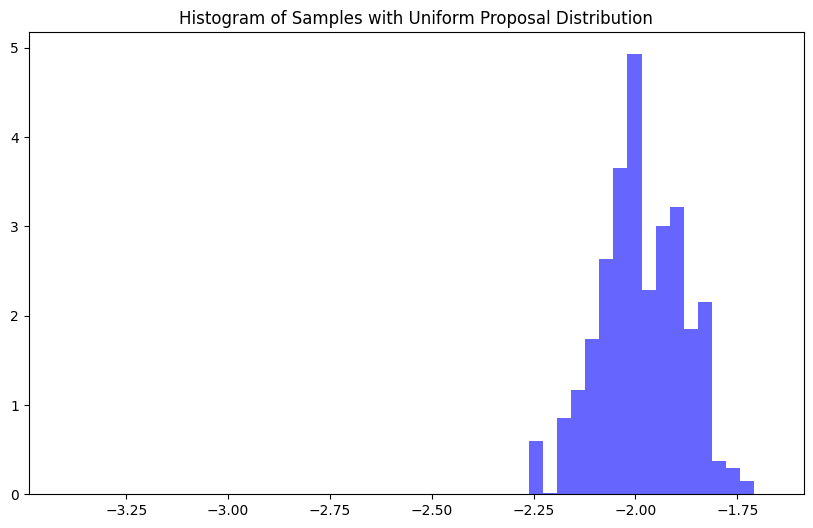

In [57]:
# 2.11 where proposed is uniform 
import numpy as np
import matplotlib.pyplot as plt

def target_distribution(x):
    mu = -2
    sigma = np.sqrt(0.01)
    return np.exp(-0.5 * ((x - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))

def rwm_algorithm_uniform(T, x0):
    samples = np.zeros(T)
    samples[0] = x0
    for t in range(1, T):
        x_current = samples[t-1]
        x_proposal = x_current + np.random.uniform(-5, 5)  # Wide range uniform proposal
        acceptance_ratio = target_distribution(x_proposal) / target_distribution(x_current)
        if np.random.rand() < acceptance_ratio:
            samples[t] = x_proposal
        else:
            samples[t] = x_current
    return samples

# Parameters
T = 10000
x0 = np.random.uniform(-5, 5)

# Run the algorithm
samples_uniform = rwm_algorithm_uniform(T, x0)
plt.figure(figsize=(10, 6))
plt.hist(samples_uniform, bins=50, density=True, alpha=0.6, color='b')
plt.title('Histogram of Samples with Uniform Proposal Distribution')
plt.show()


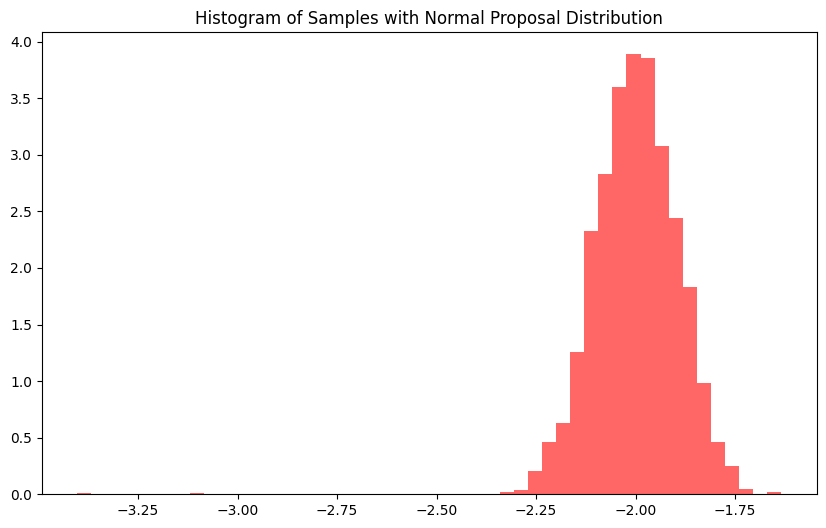

In [58]:
# where proposed is normal(0,/5)
def rwm_algorithm_normal(T, x0):
    samples = np.zeros(T)
    samples[0] = x0
    for t in range(1, T):
        x_current = samples[t-1]
        x_proposal = x_current + np.random.normal(0, 0.2)  # Narrower normal proposal
        acceptance_ratio = target_distribution(x_proposal) / target_distribution(x_current)
        if np.random.rand() < acceptance_ratio:
            samples[t] = x_proposal
        else:
            samples[t] = x_current
    return samples

# Run the algorithm
samples_normal = rwm_algorithm_normal(T, x0)
plt.figure(figsize=(10, 6))
plt.hist(samples_normal, bins=50, density=True, alpha=0.6, color='r')
plt.title('Histogram of Samples with Normal Proposal Distribution')
plt.show()
